<a href="https://colab.research.google.com/github/macmahoniatwit/Sample-Code/blob/main/ObscuredMLProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#general imports 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
sns.set(color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve


In [2]:
#getting data from csv file 

from google.colab import files
uploaded = files.upload()

Saving MLPROJ.csv to MLPROJ.csv


In [3]:
#storing in data variable 

import io 
data = pd.read_csv(io.BytesIO(uploaded['MLPROJ.csv']))

In [4]:
#checking head & tail
data.head()
data.tail()

,Unnamed: 0,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var34,Var35,Var36,Var37,Var38,Var39,Var40,Var41,Var42,Var43
1048570,51,51,58.0,92.0,NaN,103.0,76.0,54.0,16.0,NaN,...,NaN,NaN,51.0,0,0.0,1.0,-324.6,52,0,111711
1048571,52,52,56.0,92.0,NaN,95.0,69.0,50.0,19.0,NaN,...,NaN,NaN,51.0,0,0.0,1.0,-324.6,53,0,111711
1048572,53,53,61.0,95.0,37.7,103.0,77.0,56.0,20.0,NaN,...,NaN,NaN,51.0,0,0.0,1.0,-324.6,54,0,111711
1048573,54,54,59.0,95.5,NaN,99.0,72.0,56.0,22.5,NaN,...,NaN,NaN,51.0,0,0.0,1.0,-324.6,55,0,111711
1048574,55,55,62.0,94.0,NaN,117.0,84.0,58.0,15.0,NaN,...,NaN,NaN,51.0,0,0.0,1.0,-324.6,56,0,111711


In [5]:
#checking types 
data.dtypes

Unnamed: 0      int64
Var1            int64
Var2          float64
Var3          float64
Var4          float64
Var5          float64
Var6          float64
Var7          float64
Var8          float64
Var9          float64
Var10         float64
Var11         float64
Var12         float64
Var13         float64
Var14         float64
Var15         float64
Var16         float64
Var17         float64
Var18         float64
Var19         float64
Var20         float64
Var21         float64
Var22         float64
Var23         float64
Var24         float64
Var25         float64
Var26         float64
Var27         float64
Var28         float64
Var29         float64
Var30         float64
Var31         float64
Var32         float64
Var33         float64
Var34         float64
Var35         float64
Var36         float64
Var37           int64
Var38         float64
Var39         float64
Var40         float64
Var41           int64
Var42           int64
Var43           int64
dtype: object

In [6]:
#determining number of unique cases in data 
unique = len(data.Var43.unique())
print(unique)

27101


In [7]:
#dropping irrelevant columns 
data = data.drop(['Var16', 'Var17', 'Var18', 'Var19', 'Var20', 'Var21', 'Var22', 'Var23', 'Var24', 'Var25', 'Var26', 'Var27', 'Var28', 'Var29', 
                                'Var30', 'Var31', 'Var32', 'Var33', 'Var34', 'Var35', 'Var6', 'Var9', 'Var12', 'Var14', 'Var15', 'Var38', 'Var39', 'Var40', 'Var41', 'Var10', 'Var11', 'Var13', 'Unnamed: 0'], axis=1)

In [8]:
#showing new data
data.head()

,Var1,Var2,Var3,Var4,Var5,Var7,Var8,Var36,Var37,Var42,Var43
0,0,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,0,17072
1,1,65.0,100.0,NaN,NaN,NaN,16.5,68.54,0,0,17072
2,2,78.0,100.0,NaN,NaN,NaN,NaN,68.54,0,0,17072
3,3,73.0,100.0,NaN,NaN,NaN,17.0,68.54,0,0,17072
4,4,70.0,100.0,NaN,129.0,69.0,14.0,68.54,0,0,17072


In [9]:
#dimensions of data 
data.shape

(1048575, 11)

In [10]:
#checking for duplicate rows 
duplicate_rows = data[data.duplicated()]
print(duplicate_rows.shape)

(0, 11)


In [11]:
#checking number of filled values in each column 
data.count()

Var1     1048575
Var2      956353
Var3      916891
Var4      354442
Var5      892370
Var7      632209
Var8      916890
Var36    1048575
Var37    1048575
Var42    1048575
Var43    1048575
dtype: int64

In [12]:
#brief summary of the data including the index dtype and column dtypes, non-null values, and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Var1    1048575 non-null  int64  
 1   Var2    956353 non-null   float64
 2   Var3    916891 non-null   float64
 3   Var4    354442 non-null   float64
 4   Var5    892370 non-null   float64
 5   Var7    632209 non-null   float64
 6   Var8    916890 non-null   float64
 7   Var36   1048575 non-null  float64
 8   Var37   1048575 non-null  int64  
 9   Var42   1048575 non-null  int64  
 10  Var43   1048575 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 88.0 MB


In [13]:
#showing the number of elements in the data 
data.size

11534325

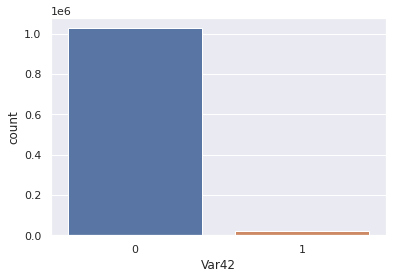

In [14]:
#barplot of target variable 
sns.countplot(x='Var42', data=data)

In [15]:
#checking to make sure these columns have no nulls (because they would need to be filled differently than the others)
var36 = data['Var36'].isna().sum()
print("Var36 = ", var36)

var37 = data['Var37'].isna().sum()
print("Var37 = ", var37)

var42 = data['Var42'].isna().sum()
print("Var42 = ", var42)

var43 = data['Var43'].isna().sum()
print("Var43 = ", var43)

var1 = data['Var1'].isna().sum()
print("Var1 = ", var1)

Var36 =  0
Var37 =  0
Var42 =  0
Var43 =  0
Var1 =  0


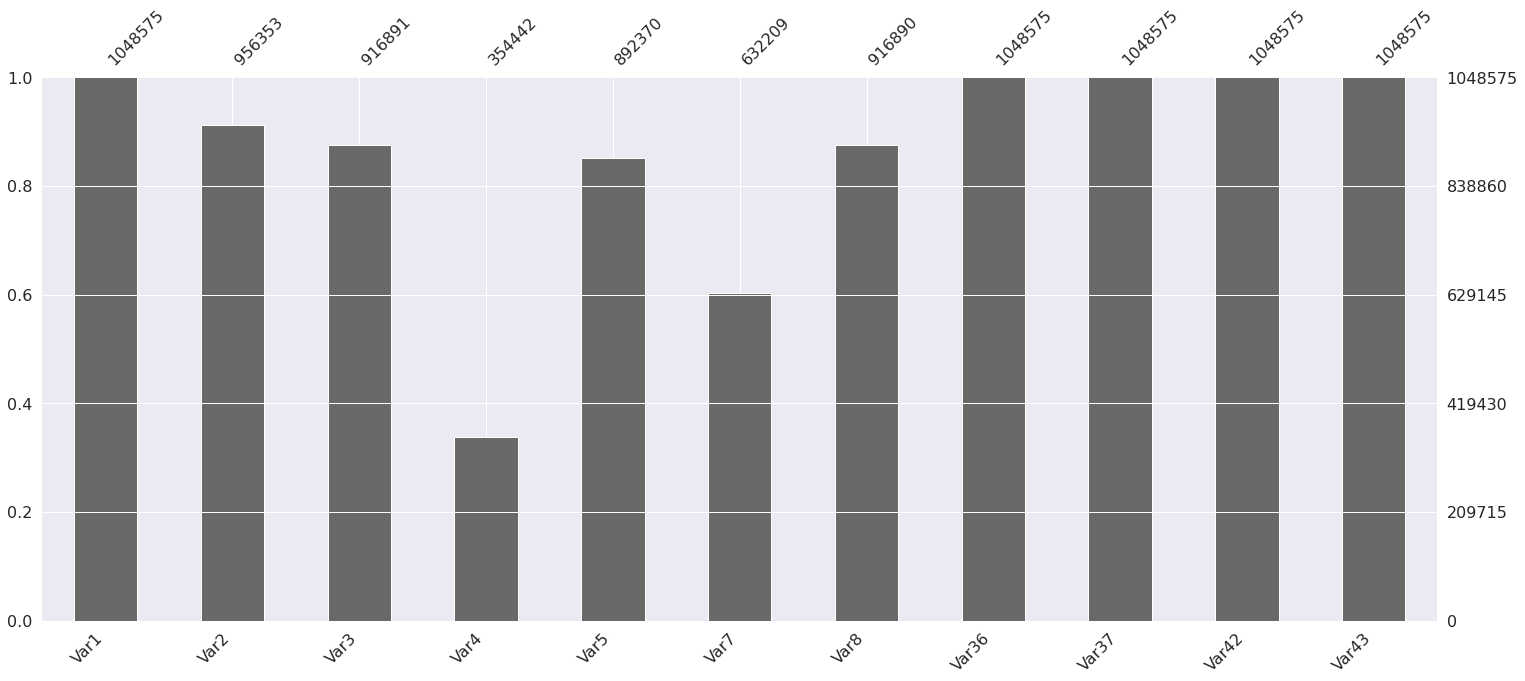

In [16]:
#bar chart to visualize the amount of missing data in each column 
msno.bar(data)

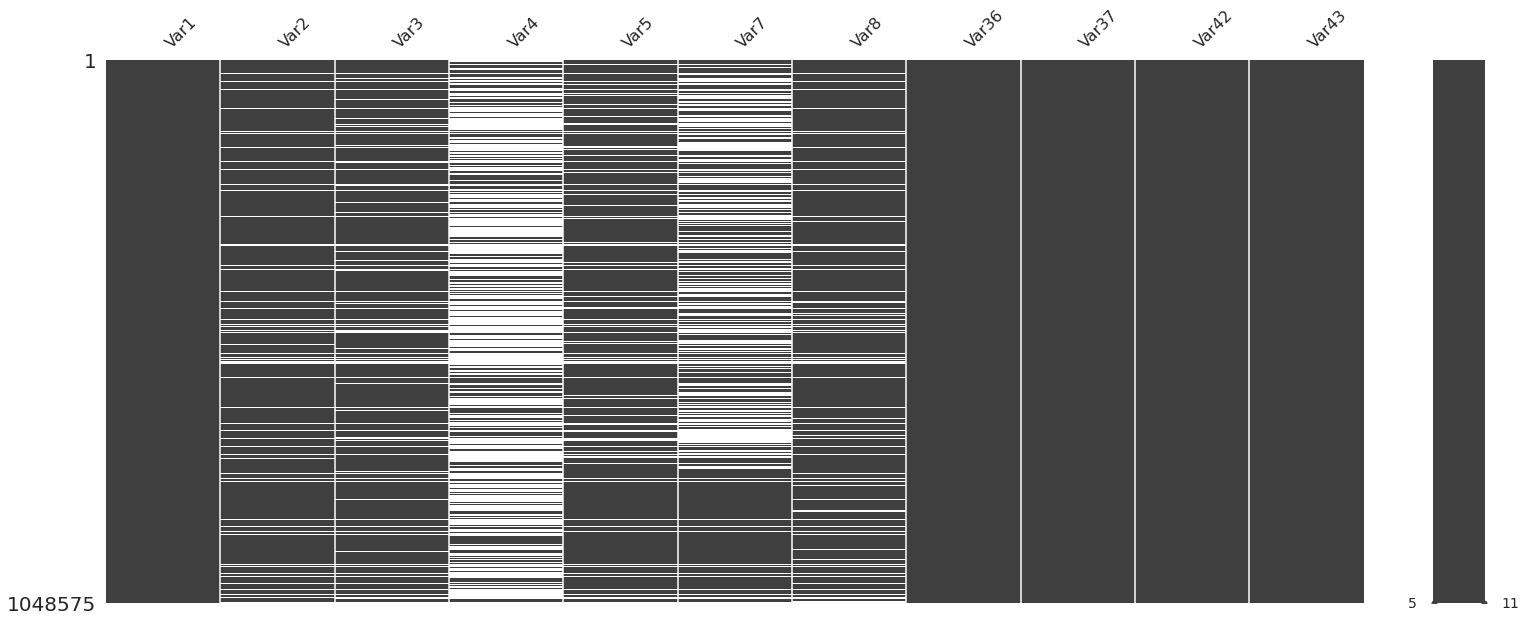

In [17]:
#shows where the missing data in (white space indicates missing data)
msno.matrix(data)

In [18]:
#using the bfill function to back fill the missing values based on values obtained at a later hour grouped by a unique identifier
data["Var4"] = data.groupby('Var43')['Var4'].transform(lambda x: x.bfill())
data["Var2"] = data.groupby('Var43')['Var2'].transform(lambda x: x.bfill())
data["Var3"] = data.groupby('Var43')['Var3'].transform(lambda x: x.bfill())
data["Var5"] = data.groupby('Var43')['Var5'].transform(lambda x: x.bfill())
data["Var7"] = data.groupby('Var43')['Var7'].transform(lambda x: x.bfill())
data["Var8"] = data.groupby('Var43')['Var8'].transform(lambda x: x.bfill())

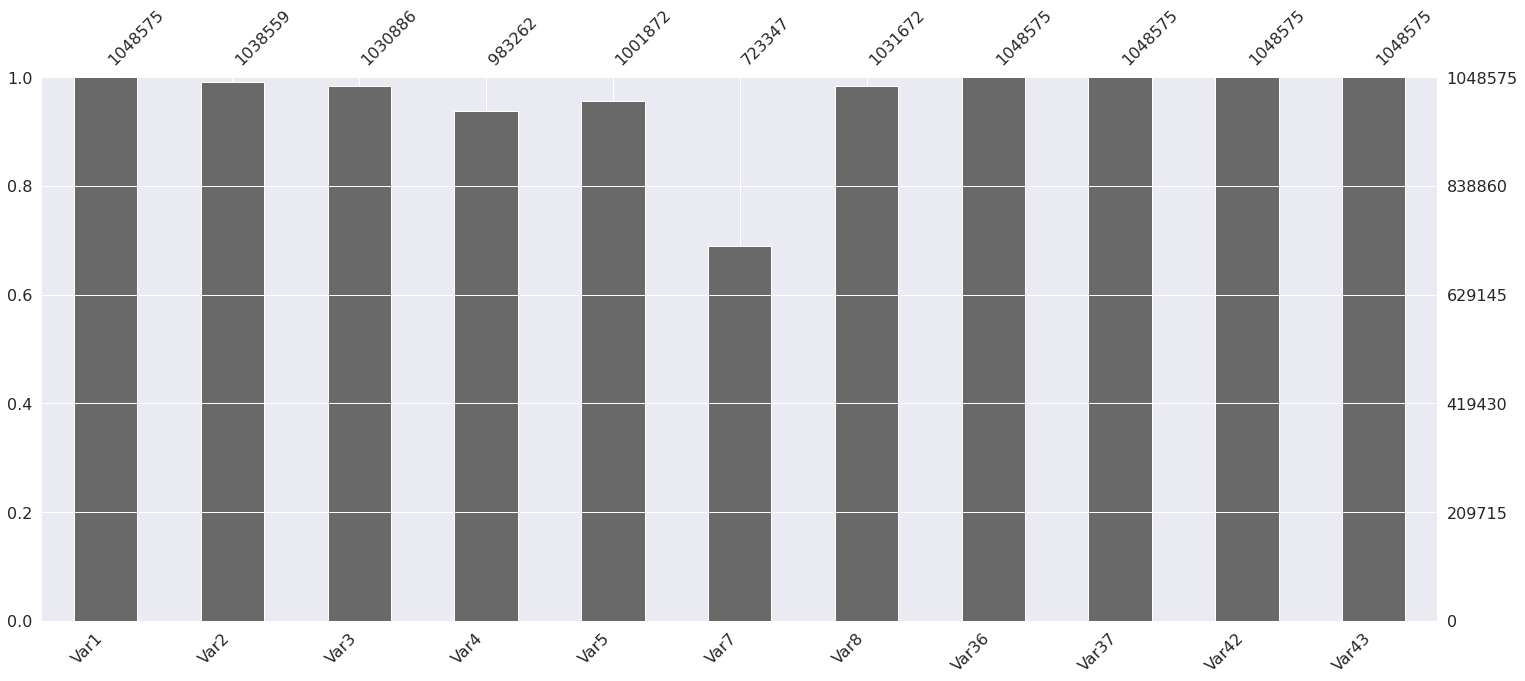

In [19]:
#new plot to visualize NaN
msno.bar(data)

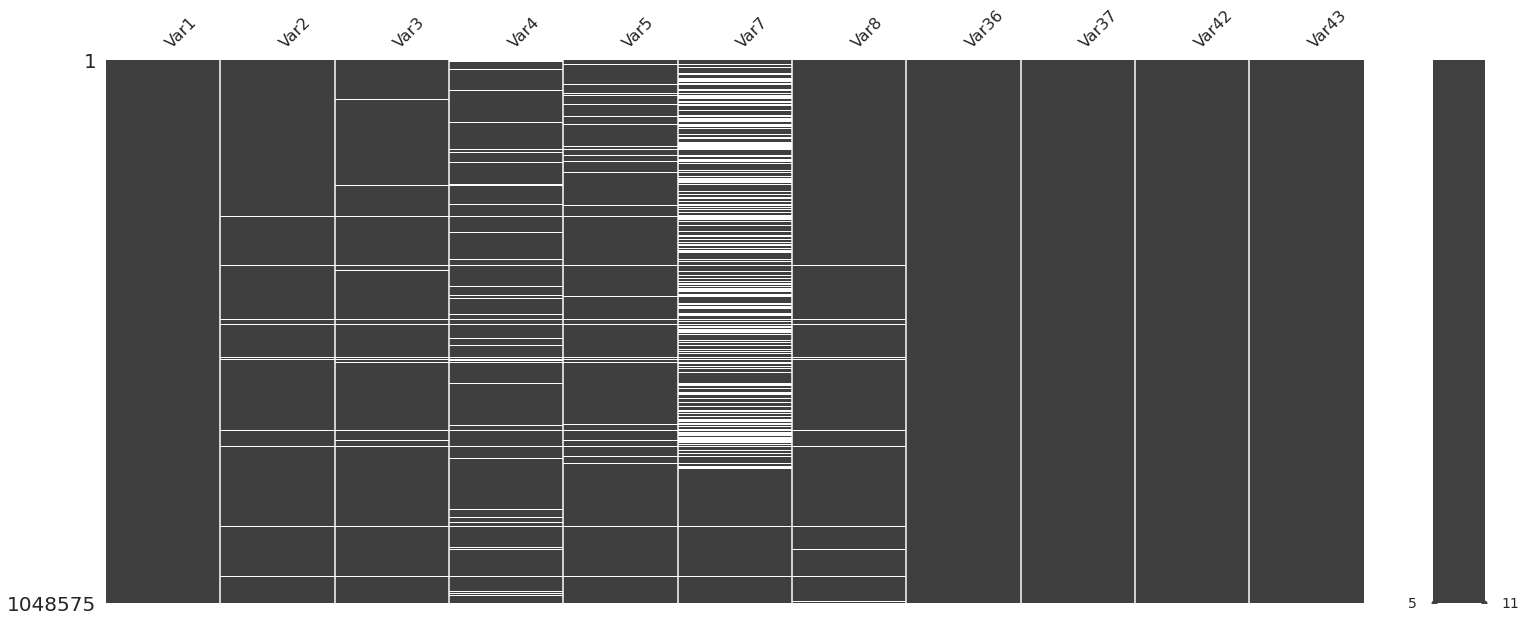

In [20]:
msno.matrix(data)

In [21]:
v4 = data.Var4.isna().sum()
v5 = data.Var5.isna().sum()

print("Var4  ", v4)
print("Var5   ", v5)

Var4   65313
Var5    46703


In [22]:
#calculates percentage of missing values in Var7
v7 = data.Var7.isna().sum()
numRows = data.shape[0]
print((v7/numRows) * 100)

31.016188636959686


In [23]:
#dropping Var7 (determined not important enough to include)
data = data.drop(['Var7'], axis=1)

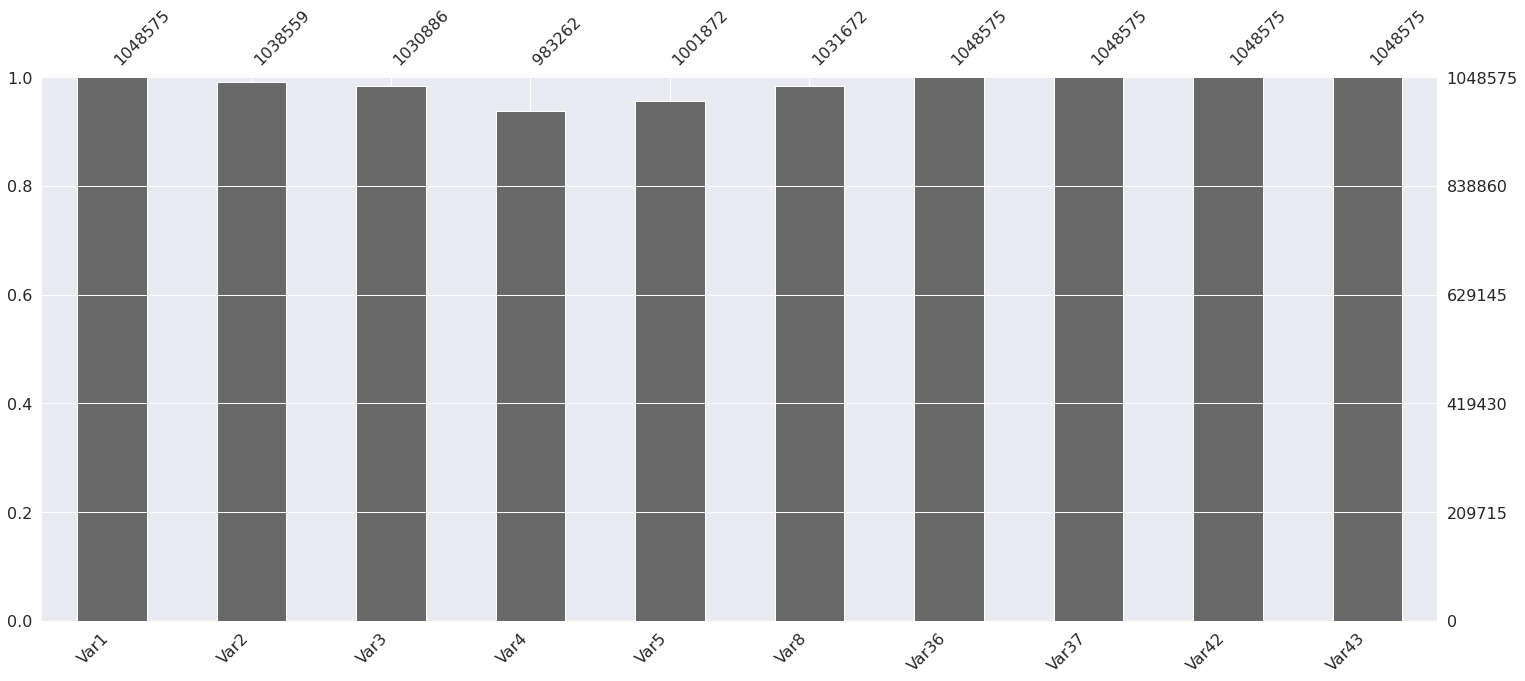

In [24]:
msno.bar(data)

In [25]:
#dropping all rows with na values 
data = data.dropna()

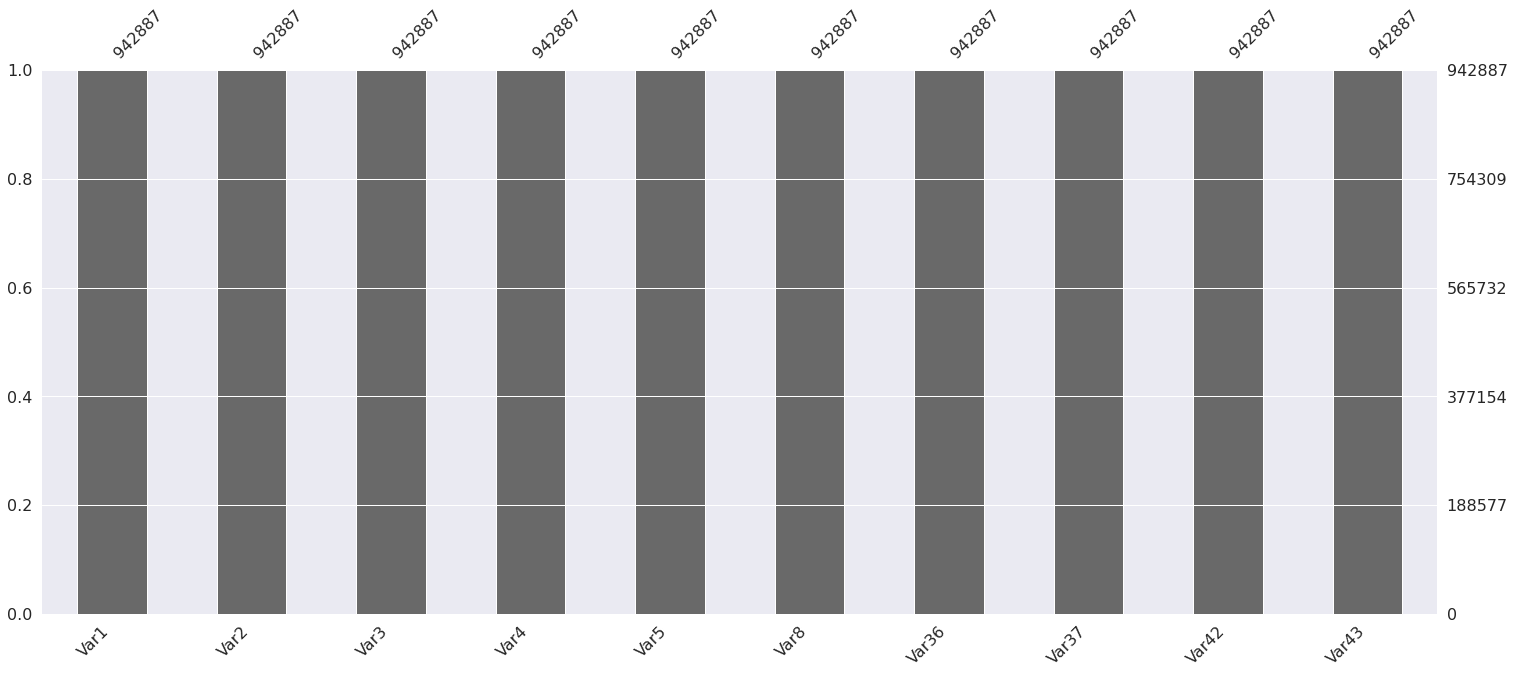

In [26]:
msno.bar(data)

In [27]:
###################################################################################################################################################################################################################################
#
#
#         ML BELOW 
#
#
####################################################################################################################################################################################################################################

In [28]:
#separating the columns into dependent and independent variable (features & label) 
#keeping ID for now but could lead to overfitting and need to be removed 

features = data[['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var8', 'Var36', 'Var37', 'Var43']] 
label = data['Var42']

In [29]:
#test/train split 70/30

features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.33, random_state = 42)

In [30]:
#finding the shape of the training and test sets to make sure everything above was done correctly 

print('Training Features Shape:', features_train.shape)
print('Testing Features Shape:', features_test.shape)

Training Features Shape: (631734, 9)
Testing Features Shape: (311153, 9)


In [31]:
#random forest 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=325, random_state=0)
rfc.fit(features_train, label_train)

y_pred = rfc.predict(features_test)


In [32]:
#Accuracy score (may not be helpful considering the imbalanced data)
print('Accuracy score: {0:0.6f}'. format(accuracy_score(label_test, y_pred)))

Accuracy score: 0.986929


In [33]:
#feature importance 
feature_scores = pd.Series(rfc.feature_importances_, index=features_train.columns).sort_values(ascending=False)

feature_scores

Var43    0.187652
Var36    0.173239
Var1     0.145781
Var4     0.115775
Var5     0.111052
Var2     0.103014
Var8     0.080989
Var3     0.062441
Var37    0.020057
dtype: float64

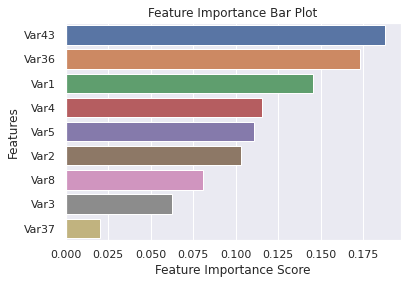

In [34]:
#bar plot to visualize feature importance 

sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Bar Plot")
plt.show()

In [35]:
#confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test, y_pred)
print( cm)

[[306022     51]
 [  4016   1064]]
